In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns 
import numpy as np


In [20]:
beige_color = (255/255,253/255,250/255)

sns.set_theme(style="white", rc={'figure.facecolor': beige_color})
sns.set_context("poster")

TRUE_EFFECT = 0.5


In [ ]:
df_N300 = pd.read_csv("linear_dgp_noisy_network_N300.csv")
df_N300

In [13]:
df_N300["RMSE"] = np.square(df_N300["mean"]-TRUE_EFFECT) + np.square(df_N300["std"])
df_N300["true_included95"] = (df_N300["q025"] <= TRUE_EFFECT) & (df_N300["q975"] >= TRUE_EFFECT) 
df_N300["true_included99"] = (df_N300["q005"] <= TRUE_EFFECT) & (df_N300["q995"] >= TRUE_EFFECT) 
df_N300['bias'] = df_N300['mean'] - TRUE_EFFECT
df_N300["CI_length95"] = df_N300["q975"] - df_N300["q025"] 
df_N300["CI_length99"] = df_N300["q995"] - df_N300["q005"] 


In [14]:
df_N300.groupby("type").agg({'mean' : ['mean'],
                             'median' : ['median'],
                             'std' : ['mean'],
                             'bias' : ['mean'],
                             'RMSE' : ['mean'],
                             'q025' : ['median'],
                             'q975' : ['median'],
                             'min' : ['median'],
                             'max' : ['median'],
                             'true_included95' : ['mean'],
                             'true_included99' : ['mean']})

,mean,median,std,bias,RMSE,q025,q975,min,max,true_included95,true_included99
,mean,median,mean,mean,mean,median,median,median,median,mean,mean
type,,,,,,,,,,,
cut-2S,0.242232,0.242094,0.045991,-0.257768,0.069585,0.153624,0.330232,0.019893,0.463938,0.000000,0.000000
cut-3S,0.242534,0.239440,0.060131,-0.257466,0.070937,0.136931,0.365642,0.011508,0.553003,0.000000,0.020000
observed,0.224526,0.224176,0.029482,-0.275474,0.077659,0.167174,0.280968,0.110371,0.339188,0.000000,0.000000
oracle,0.502837,0.504506,0.027725,0.002837,0.001603,0.450888,0.557387,0.394809,0.610011,0.953333,0.976667
plugin,0.483684,0.476388,0.048444,-0.016316,0.005983,0.384461,0.568390,0.295177,0.662064,0.893333,0.966667


In [15]:
np.std(df_N300[df_N300['type'] =="plugin"]['mean'])

0.05770411427400561

Text(0.5, 0, '')

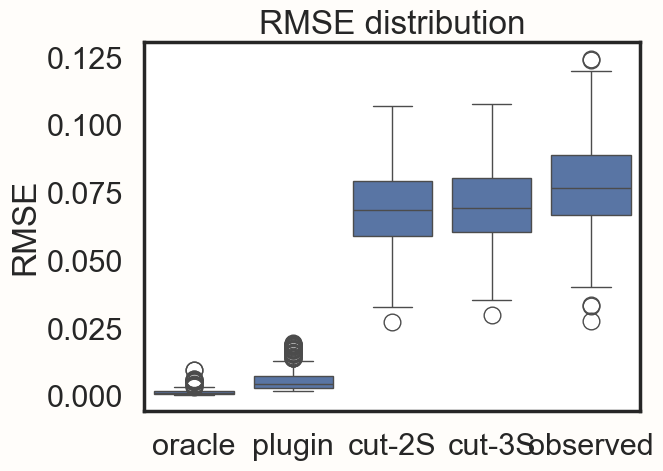

In [21]:
box_rmse = sns.boxplot(data=df_N300, x = 'type', y = 'RMSE',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_rmse.set_title("RMSE distribution")
box_rmse.set_xlabel("")
# sns.despine()

Text(0.5, 1.0, 'bias distribution')

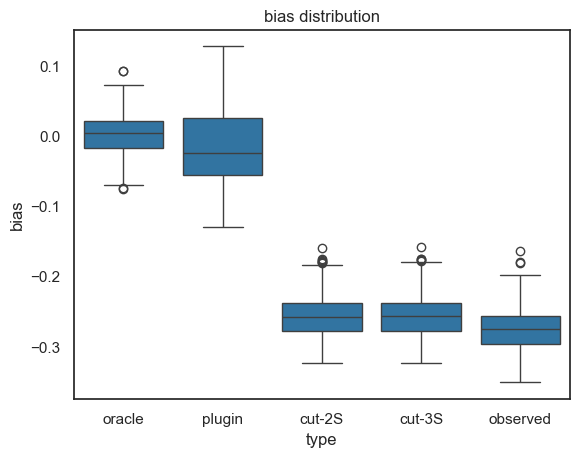

In [6]:
box_bias = sns.boxplot(data=df_N300, x = 'type', y = 'bias',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_bias.set_title("bias distribution")

Text(0.5, 1.0, 'Std distribution')

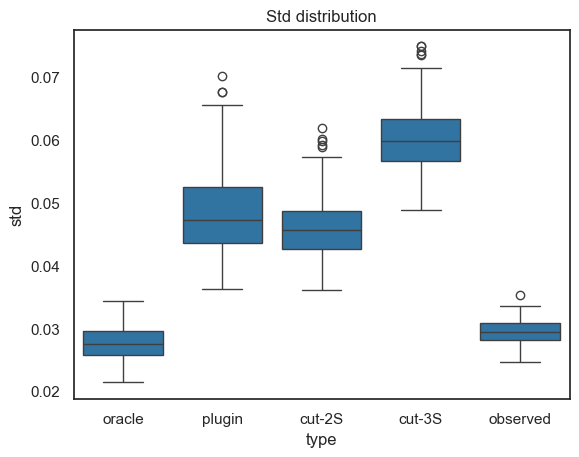

In [7]:
box_std = sns.boxplot(data=df_N300, x = 'type', y = 'std',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_std.set_title("Std distribution")

Text(0.5, 1.0, 'Length of 95% CI distribution')

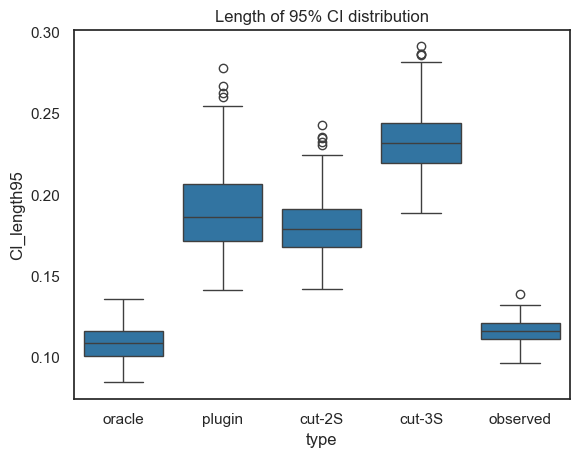

In [8]:
box_ci95 = sns.boxplot(data=df_N300, x = 'type', y = 'CI_length95',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_ci95.set_title("Length of 95% CI distribution")

Text(0.5, 1.0, 'Length of 99% CI distribution')

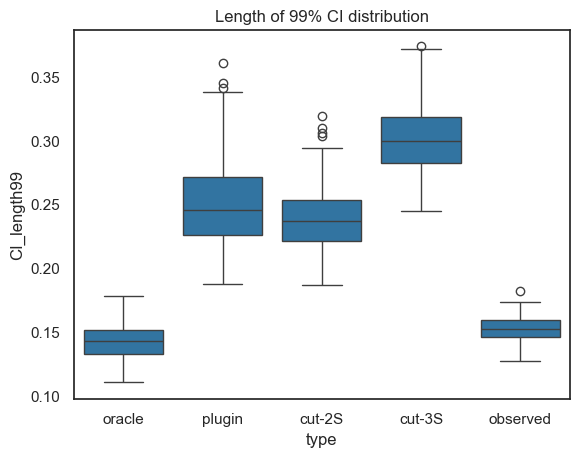

In [43]:
box_ci99 = sns.boxplot(data=df_N300, x = 'type', y = 'CI_length99',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_ci99.set_title("Length of 99% CI distribution")